# Статистика, DS-поток
## Задание SP.2

Задача 1: Визуализация несмещенности                                                                                                        .
▫️ Наличие решения. (20.0)
▫️ Нет комментария про ас. несмещенность. Комм. Стоило заметить, что $X_{(n)}$ является асимптотически несмещенной. (-3.0)
▫️ Инд. комм. Не очень говорящий график, хотелось бы увидеть графики аналогичные семинару (-5.0)
Баллы: 12.0 / 20.0

Задача 2: Визуализция состоятельности и ас. нормальности. .
▫️ Наличие решения. (20.0)
▫️ Нет визуализации. Комм. Нет визуализации распределения для статистики $Z_n$. . (-5.0)
Баллы: 15.0 / 20.0

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

---

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** 
### 1. Оценка $X_{(n)}$
$$
\mathsf{E}[X_{(n)}] = \frac{n}{n+1} \theta
$$
Таким образом, оценка $X_{(n)}$ **смещённая**, так как её математическое ожидание не равно $\theta$, а равно $\frac{n}{n+1}\theta$.

### 2. Оценка $\frac{n+1}{n} X_{(n)}$
$$
\mathsf{E}\left[\frac{n+1}{n} X_{(n)}\right] = \frac{n+1}{n} \cdot \mathsf{E}[X_{(n)}] = \frac{n+1}{n} \cdot \frac{n}{n+1} \theta = \theta
$$
Таким образом, оценка $\frac{n+1}{n} X_{(n)}$ является **несмещённой**.

### 3. Оценка $2 \overline{X}$
$$
\mathsf{E}[\overline{X}] = \frac{\theta}{2}
$$
Следовательно, математическое ожидание оценки $2 \overline{X}$:
$$
\mathsf{E}[2 \overline{X}] = 2 \cdot \mathsf{E}[\overline{X}] = 2 \cdot \frac{\theta}{2} = \theta
$$
Таким образом, оценка $2 \overline{X}$ также является **несмещённой**.

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на занятии.

**Решение:**

Истинное значение θ: 5
Среднее значение оценки X_(n): 4.546275729821677
Среднее значение оценки (n+1)/n * X_(n): 5.000903302803846
Среднее значение оценки 2 * X̄: 4.98733120206905


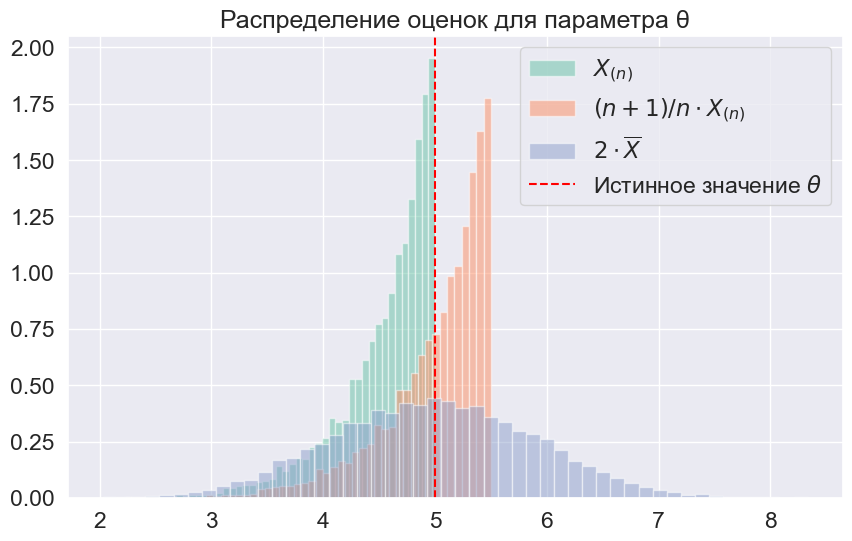

In [11]:
# Параметры
theta_true = 5  # истинное значение параметра θ
n = 10  # размер выборки
num_experiments = 10000  # количество экспериментов

# Инициализация массивов для хранения результатов
estimates_max = []
estimates_max_corrected = []
estimates_mean = []

# Проведение экспериментов
for _ in range(num_experiments):
    # Генерация выборки из U[0, theta]
    sample = np.random.uniform(0, theta_true, size=n)
    
    # Оценка X_(n) (максимум выборки)
    X_n = np.max(sample)
    
    # Оценка (n+1)/n * X_(n)
    X_n_corrected = (n + 1) / n * X_n
    
    # Оценка 2 * X̄ (удвоенное среднее выборки)
    X_mean = 2 * np.mean(sample)
    
    # Сохранение результатов
    estimates_max.append(X_n)
    estimates_max_corrected.append(X_n_corrected)
    estimates_mean.append(X_mean)

# Вычисление средних значений для каждой оценки
mean_max = np.mean(estimates_max)
mean_max_corrected = np.mean(estimates_max_corrected)
mean_mean = np.mean(estimates_mean)

# Вывод результатов
print(f"Истинное значение θ: {theta_true}")
print(f"Среднее значение оценки X_(n): {mean_max}")
print(f"Среднее значение оценки (n+1)/n * X_(n): {mean_max_corrected}")
print(f"Среднее значение оценки 2 * X̄: {mean_mean}")

# Визуализация распределений оценок
plt.figure(figsize=(10, 6))
plt.hist(estimates_max, bins=50, alpha=0.5, label=r"$X_{(n)}$", density=True)
plt.hist(estimates_max_corrected, bins=50, alpha=0.5, label=r"$(n+1)/n \cdot X_{(n)}$", density=True)
plt.hist(estimates_mean, bins=50, alpha=0.5, label=r"$2 \cdot \overline{X}$", density=True)
plt.axvline(theta_true, color='r', linestyle='--', label=r"Истинное значение $\theta$")
plt.title("Распределение оценок для параметра θ")
plt.legend()
plt.show()

**Вывод:**
- **Несмещённые оценки**: Оценки $\frac{n+1}{n} X_{(n)}$ и $2 \overline{X}$ должны давать средние значения, близкие к $\theta = 5$, так как они являются несмещёнными.
- **Смещённая оценка**: Оценка $X_{(n)}$ должна давать среднее значение, меньшее, чем $\theta$, так как она является смещённой.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2 = \overline{X^2} - \overline{X}^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

Зададим параметры эксперимента, сгенерируем множество выборок, посчитаем по каждой из них оценку в зависимости от размера выборки.

In [7]:
# Задаем параметры
a = 5  # истинное значение математического ожидания
sigma = 2  # истинное значение стандартного отклонения
size = 300  # размер выборки
samples_count = 500  # количество выборок
n_range = (np.arange(size) + 1)  # размеры подвыборок

# Генерация выборок из нормального распределения
samples = sps.norm(loc=a, scale=sigma).rvs(size=(samples_count, size))

# Расчет оценок S^2
x_bar = samples.cumsum(axis=1) / n_range  # среднее по выборке
x_square_bar = (samples**2).cumsum(axis=1) / n_range  # среднее квадратов выборки
S2_estimation = x_square_bar - x_bar**2  # оценка дисперсии S^2


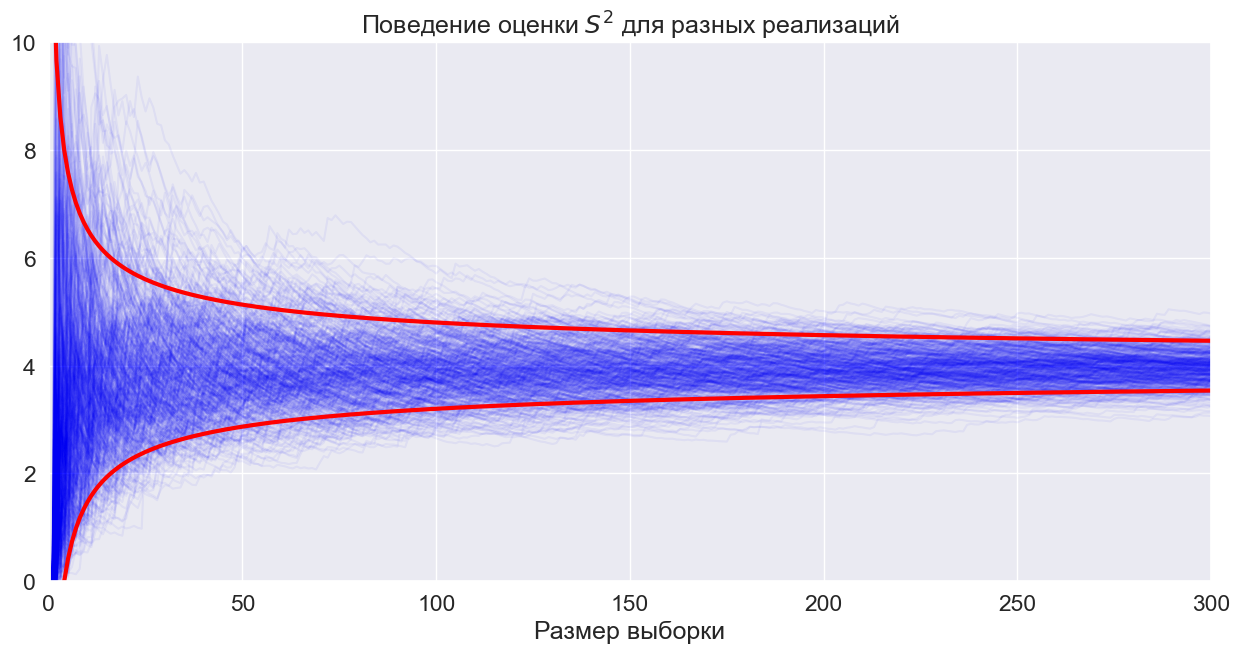

In [8]:
# Построение графика
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(n_range, S2_estimation[i], color='blue', alpha=0.05)

# Теоретические границы (асимптотическая нормальность)
plt.plot(n_range, sigma**2 + 2 * sigma**2 / np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, sigma**2 - 2 * sigma**2 / np.sqrt(n_range), color='red', lw=3)

plt.title('Поведение оценки $S^2$ для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 10))
plt.xlim((0, size))
plt.show()

**Вывод:**
1. С ростом размера выборки траектории оценок сходятся к истинному значению параметра, об этом говорит свойство *состоятельности*.
2. Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\sigma^2\left/\sqrt{n}\right.$. Это также можно увидеть на графике.